<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Linear_Regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount( '/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/BaseDados_RegressaoLinear.xls'

dados = pd.read_excel( url )
dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [46]:
dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [47]:
print( dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


In [36]:
print( dados.shape )

(99, 2)


Text(0, 0.5, 'Limite')

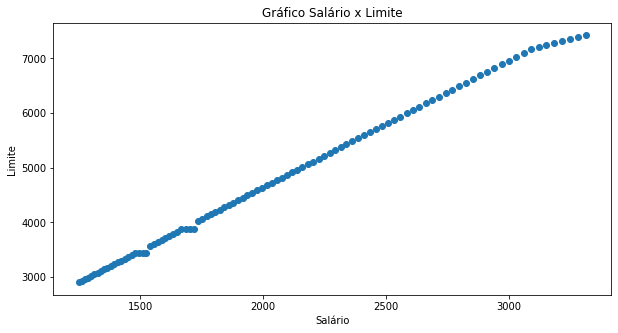

In [48]:
# Converter os dados para array
X = dados.iloc[ :, 0 ].values
y = dados.iloc[ :, 1 ].values

plt.figure( figsize=(10,5) )
plt.scatter( X, y )
plt.title( 'Gráfico Salário x Limite' )
plt.xlabel('Salário')
plt.ylabel('Limite')

<AxesSubplot:>

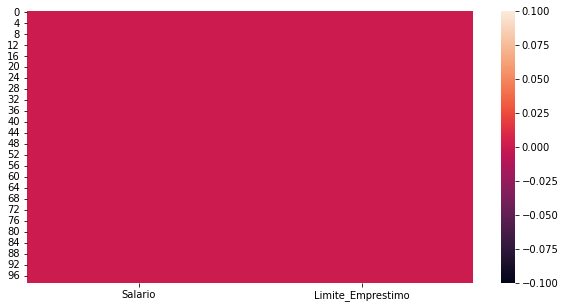

In [49]:
# Verificando valores nulos
plt.figure( figsize=(10,5))
sns.heatmap( dados.isnull() ) 

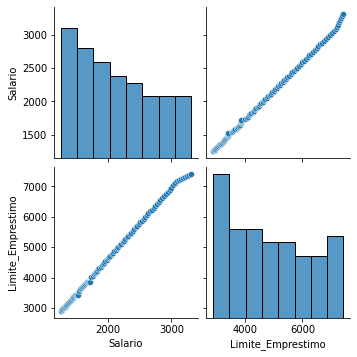

In [54]:
sns.pairplot( dados )

In [55]:
correlacao = np.corrcoef( X, y )
correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

<AxesSubplot:>

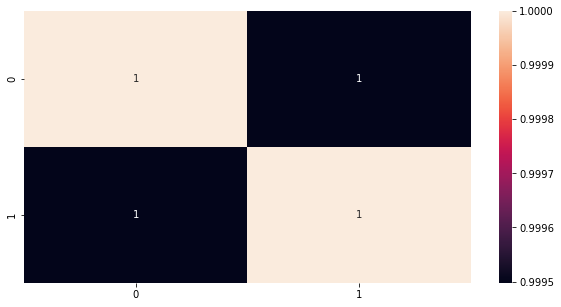

In [57]:
plt.figure( figsize=(10,5))
sns.heatmap( correlacao, annot=True )

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
X_features = ['Salario']
X = dados[ X_features ]

y = dados['Limite_Emprestimo']

X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size=0.20 )

print( 'Dados de Treinamento: {0}, Dados de Teste: {1}'.format( len(X_train), len(X_teste) ) )

Dados de Treinamento: 79, Dados de Teste: 20


In [63]:
modelo = LinearRegression()
modelo.fit( X_train, y_train )

LinearRegression()

In [64]:
print( 'Score do modelo:',modelo.score( X_train, y_train ) )

Score do modelo: 0.998821872548134


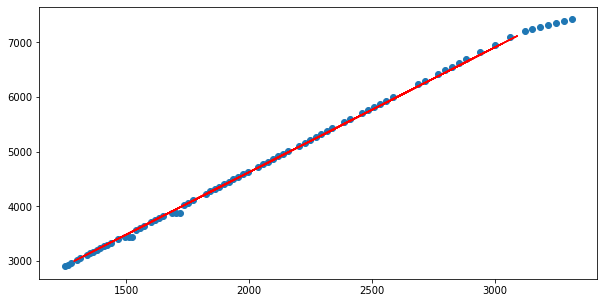

In [67]:
predicao = modelo.predict( X_teste )

plt.figure( figsize=(10,5))
plt.scatter( X_train, y_train )
plt.plot( X_teste, predicao, color='red' )

In [69]:
# Avaliando o Modelo
from sklearn import metrics

print( 'RMSE', np.sqrt( metrics.mean_squared_error( y_teste, predicao ) ) )


RMSE 31.033829449590435


In [74]:
# Efetuando Predições
X_salario = 15000.00
y_predito = modelo.predict( [ [ X_salario ] ] )

print( 'Predição de Empréstimo ]para um Salário de {0} é de {1}'.format( X_salario, y_predito ) );

Predição de Empréstimo ]para um Salário de 15000.0 é de [34318.67401094]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
